# RECESS PROJECT 2021

2018 Crime Statistics By Category Of Crime Analysis

Group E1

Data sources

2018 Crime Statistics By Category Of Crime Analysis csv file provided


# imports to be used

In [1]:
# importing the neccessary modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from plotly import __version__
# plotly to help us plot interactive graphs, cufflinks to link pandas to plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
init_notebook_mode(connected=True)
cf.go_offline()

# Reading data from the datasets 2018 Crime Statistics by Category of Crime¶

In [2]:
#  using set option attribute to indicate the rows and columns
pd.set_option('display.max_rows',127)
pd.set_option('display.max_columns',38)

In [3]:
#display the dataset given excluding the headers
df=pd.read_csv("2018CrimeStatisticsByCategoryOfCrime.csv",header=None,) 
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
0,NaN,NaN,REPORTED CASES,NaN,NaN,NaN,PERFOMANCE,NaN,NaN,NaN,NaN,PERSONS TAKEN TO COURT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SENTENCES IMPOSED BY COURTS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ACCUSED CHARGED,NaN,NaN,NaN,ACCUSED CONVICTED,NaN,NaN,NaN,NaN,NaN,NaN,IMPRISONMENT,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,VICTIMS OF CRIME,NaN,NaN,NaN,VALUE PROPERTY(UGSHS.),NaN
2,NaN,NaN,Totals Cases,Cases under Inquiry,Not Detected/NPW,Cases taken to court,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court,Male Adult,Male Juven.,Female Adult,Female Juven.,Male Adult,Male Juven.,Female Adult,Female Juven.,Acquitted,Discharged,Awaiting Trial,Male Adult,Male Juven.,Female Adult,Female Juven.,Death,Fined,Probation Bound Over,CAUTION,COMM. WORK,Fines Awarded (UgShs.),Male Adult,Male Juven.,Female Adult,Female Juven.,Lost,Recovered
3,S/No.,CASE/CRIME INCIDENCES,1,2,3,4,5,6,7,8,9,10,NaN,NaN,NaN,11,NaN,NaN,NaN,12,13,14,NaN,NaN,NaN,15,16,17,18,19,20,21,NaN,NaN,NaN,22,23,24
4,NaN,HOMICIDES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,98,UWA Statute,648,112,89,447,485,269,8,26,144,609,7,17,-,377,-,11,-,10,42,193,249,3,4,-,-,107,-,15,10,172222000,608,-,8,-,26000000,26000000
124,99,Local Government Act,4,2,1,1,1,-,-,-,1,1,-,-,-,-,-,-,-,-,-,1,-,-,-,-,-,-,-,-,-,-,4,-,-,-,-,-
125,100,All other Acts,821,345,189,287,430,173,7,19,93,641,12,76,-,323,8,44,-,1,56,297,121,2,3,-,-,120,21,41,60,69060000,710,10,62,9,241790000,440000
126,NaN,Sub Total(Other Laws),3006,749,620,1637,1885,991,24,127,500,3592,49,416,138,2183,54,314,19,29,280,1316,1291,7,18,-,-,810,21,292,123,518202000,2676,10,115,9,274390000,26440000


#### Now having identified the rows, indexes and column names lets create a list of multilevel index for the data provided to give it more meaning. We shall start defining the column tuples and then use pandas methods to create pandas multilevel header. Also we shall read data from specific rows and columns and add it to the dataframe we are creating

# We shall start defining the column tuples and then use pandas methods to create pandas multilevel header

In [4]:
# listing of columns names of the dataset
columns=[
       ('REPORTED CASES','Total Cases'),('REPORTED CASES','Cases under Inquiry'),
    ('REPORTED CASES','Not Detected/NPW'),('REPORTED CASES','Cases taken to court'),
    
    ('PERFORMANCE','Cases submitted toDPP/RSA'),('PERFORMANCE','Cases with convictions'),
    ('PERFORMANCE','Cases with Acquittals'),('PERFORMANCE','Cases Dismissed'),
    ('PERFORMANCE','Cases pending in Court'),
    
    ('PERSONS TAKEN TO COURT','ACCUSED CHARGED','Male Adult'),('PERSONS TAKEN TO COURT','ACCUSED CHARGED','Male Juven.')
    ,('PERSONS TAKEN TO COURT','ACCUSED CHARGED','Female Adult'),('PERSONS TAKEN TO COURT','ACCUSED CHARGED','Female Juven.'),
    ('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Male Adult'),('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Male Juven.'),
    ('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Female Adult'), ('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Female Juven.'),
    ('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Acquitted'),('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Discharged'),
    ('PERSONS TAKEN TO COURT','ACCUSED CONVICTED','Awaiting Trial'),
    
    
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Male Adult'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Male Juven.')
    ,('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Female Adult')
    ,('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Female Juven.'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Death'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Fined'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Probation Bound Over'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','CAUTION'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','COMM. WORK'),
    ('SENTENCES IMPOSED BY COURTS','IMPRISONMENT','Fines Awarded (UgShs.)'),
    ('SENTENCES IMPOSED BY COURTS','VICTIMS OF CRIME','Male Adult'),
    ('SENTENCES IMPOSED BY COURTS','VICTIMS OF CRIME','Male Juven.')
    ,('SENTENCES IMPOSED BY COURTS','VICTIMS OF CRIME','Female Adult'),
    ('SENTENCES IMPOSED BY COURTS','VICTIMS OF CRIME','Female Juven.'),
    ('SENTENCES IMPOSED BY COURTS','VALUE PROPERTY(UGSHS.)','Lost'),
    ('SENTENCES IMPOSED BY COURTS','VALUE PROPERTY(UGSHS.)','Recovered')
    
        ]
columns

[('REPORTED CASES', 'Total Cases'),
 ('REPORTED CASES', 'Cases under Inquiry'),
 ('REPORTED CASES', 'Not Detected/NPW'),
 ('REPORTED CASES', 'Cases taken to court'),
 ('PERFORMANCE', 'Cases submitted toDPP/RSA'),
 ('PERFORMANCE', 'Cases with convictions'),
 ('PERFORMANCE', 'Cases with Acquittals'),
 ('PERFORMANCE', 'Cases Dismissed'),
 ('PERFORMANCE', 'Cases pending in Court'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CHARGED', 'Male Adult'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CHARGED', 'Male Juven.'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CHARGED', 'Female Adult'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CHARGED', 'Female Juven.'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CONVICTED', 'Male Adult'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CONVICTED', 'Male Juven.'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CONVICTED', 'Female Adult'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CONVICTED', 'Female Juven.'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CONVICTED', 'Acquitted'),
 ('PERSONS TAKEN TO COURT', 'ACCUSED CON

In [5]:
# getting data from specific rows and columns 
dcf=df.loc[4:,2:]
dcf

,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,190,117,29,44,74,3,1,1,39,85,-,-,-,4,-,-,-,1,1,79,4,-,-,-,-,-,-,-,-,-,197,4,17,-,11500000,-
6,636,431,109,96,176,2,-,1,93,194,-,10,-,3,-,-,-,-,3,198,3,-,-,-,-,-,-,-,-,-,619,11,25,1,-,-
7,81,54,12,15,17,-,-,-,15,9,-,9,-,-,-,-,-,-,-,18,-,-,-,-,-,-,-,-,-,-,65,9,14,4,-,-
8,362,107,24,231,239,15,-,2,214,208,4,73,2,7,1,6,-,-,4,269,3,1,10,-,-,-,-,-,-,-,174,25,138,16,-,-
9,42,25,11,6,14,-,-,-,6,8,2,3,-,-,-,-,-,-,-,13,-,-,-,-,-,-,-,-,-,-,16,24,7,19,-,-
10,3186,1740,626,820,1259,25,2,8,785,1062,29,126,3,27,2,-,-,3,16,1172,26,1,-,-,-,1,-,-,1,-,2475,192,473,104,600000,-
11,4497,2474,811,1212,1779,45,3,12,1152,1566,35,221,5,41,3,6,-,4,24,1749,36,2,10,-,-,1,-,-,1,-,3546,265,674,144,12100000,-
12,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,-,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,199,172,19,8,48,3,-,-,5,10,-,1,-,5,-,-,-,-,-,6,4,-,-,-,-,1,-,-,-,3000000,178,-,13,-,54403285118,602281000


In [6]:
# setting the column names as multiIndex 
dcf.columns=pd.MultiIndex.from_tuples(columns)
dcf

REPORTED CASES                                                            \
       Total Cases Cases under Inquiry Not Detected/NPW Cases taken to court   
               NaN                 NaN              NaN                  NaN   
4              NaN                 NaN              NaN                  NaN   
5              190                 117               29                   44   
6              636                 431              109                   96   
7               81                  54               12                   15   
8              362                 107               24                  231   
9               42                  25               11                    6   
10            3186                1740              626                  820   
11            4497                2474              811                 1212   
12               -                   -                -                    -   
13             199                 172               19                    8   
14              58                  49                6                    3   
15              50                  39               11                    -   
16             541                 215              159                  167   
17             898                 525              186                  187   
18             344                 221               80                   43   
19              17                  15                1                    1   
20           12313                5776             3936                 2601   
21             198                 142               40                   16   
22             345                 171              124                   50   
23             136                  86               13                   37   
24           15099                7411             4575                 3113   
25               -                   -                -                    -   
26               -                   -                -                    -   
27            1580                 618              318                  644   
28           15366                6166             3615                 5585   
29             396                 118              114                  164   
30              79                  29               34                   16   
31             100                  30               25                   45   
32           17521                6961             4106                 6454   
33               -                   -                -                    -   
34            6757                2499             3865                  393   
35            2299                 752             1430                  117   
36             245                  97               95                   53   
37              84                  33               25                   26   
38             612                 265              248                   99   
39            1449                 445              926                   78   
40              51                  13               21                   17   
41              92                  42               39                   11   
42           11589                4146             6649                  794   
43               -                   -                -                    -   
44            6867                2256             1511                 3100   
45            3368                1038              693                 1637   
46            2000                 670              390                  940   
47             447                 223               84                  140   
48            1336                 368              264                  704   
49           14018                4555             2942                 6521   
50               -                   -                -                    -   
51  

# Cleaning the datasets
setting the indices

In [7]:
# setting the indices 
dcf.index=[df[0][4:],df[1][4:]]
# setting the index names 
dcf.index.names=['S/No.','CASE/CRIME INCIDENCES']

# filling all the nan in the column with white space 
dcf.columns= pd.MultiIndex.from_frame(dcf.columns.to_frame().fillna(''))

# filling all the nan in the index with white space 
dcf.index= pd.MultiIndex.from_frame(dcf.index.to_frame().fillna(''))
# filling the nan in the rest with - to indicate either no value or entering into a different catergory
dcf.fillna('-',inplace=True)

dcf

0                                                  REPORTED CASES  \
1                                                     Total Cases   
2                                                                   
S/No. CASE/CRIME INCIDENCES                                         
      HOMICIDES                                                 -   
1     Death  (by shooting)                                    190   
2     Death (by mob action)                                   636   
3     Death (Poisoning)                                        81   
4     Death (Aggravated Domestic Violence)                    362   
5     Death(Fire Out Breaks)                                   42   
8     Other Death (Not Specified above)                      3186   
      Sub Total(Homicides)                                   4497   
      ECONOMIC CRIMES                                           -   
9     Embezzlement                                            199   
10    Causing Financial losss                                  58   
11    Abuse of office                                          50   
12    Counterfeiting                                          541   
13    Forgeries & Uttering of Documents                       898   
14    Issuing False Cheques                                   344   
15    Bank and Other Corporate Frauds                          17   
16    Obtaining By False Pretences                          12313   
17    Cyber (Computer) crimes                                 198   
18    Land Frauds                                             345   
19    Other Economic crimes                                   136   
      Sub Total(Economic crimes)                            15099   
      GENERAL CRIMES                                            -   
      (a) Sex Related Offences                                  -   
20    Rape                                                   1580   
21    Defilement                                            15366   
22    Indecent Assault                                        396   
23    Incest                                                   79   
24    Unnatural Offences                                      100   
      Sub Total(Sex Related)                                17521   
      (b) Child Related Offences                                -   
25    Child Neglect                                          6757   
26    Child Desertion                                        2299   
27    Child Stealing                                          245   
28    Child Trafficking                                        84   
29    Child Abduction/Kidnap                                  612   
31    Child Abuse/Torture                                    1449   
32    Infanticide                                              51   
33    Abortion                                                 92   
      Sub Total(Child Related)                              11589   
      (c ) Breakings                                            -   
34    Burglaries                                             6867   
35    House Breakings                                        3368   
36    Shop Breaking                                          2000   
37    Office Breaking                                         447   
38    Other Breakings (garage ,etc )                         1336   
      Sub Total(Breakings)                                  14018   
      (d) Thefts                                                -   
39    Theft of Motor Vehicles                                1200   
40    Theft of Motor Cycles                                  4612   
41    Theft from M/Vs (Spares)                               1093   
42    Theft from M/Vs (property)                              597   
43    Theft of Bicycles                                      1028   
44    Theft of Computers(Laptops)                             796   
45    Thefts of Mobile Phones                                6205  

In [8]:
# Then replacing all the unused cells with 0
dcf.replace('-',0,inplace=True)
# replacing the commas so as to enable us avoid having strings in the values
dcf.replace(',','', regex=True, inplace=True)
data = dcf.select_dtypes(object).columns
dcf[data] = dcf[data].apply(pd.to_numeric,errors='coerce')
#If 'coerce', then invalid parsing will be set as NaN..
dcf.abs()

#abs() function is used to return the absolute value of a number, i.e., it will remove the negative sign of the number

0                                                  REPORTED CASES  \
1                                                     Total Cases   
2                                                                   
S/No. CASE/CRIME INCIDENCES                                         
      HOMICIDES                                                 0   
1     Death  (by shooting)                                    190   
2     Death (by mob action)                                   636   
3     Death (Poisoning)                                        81   
4     Death (Aggravated Domestic Violence)                    362   
5     Death(Fire Out Breaks)                                   42   
8     Other Death (Not Specified above)                      3186   
      Sub Total(Homicides)                                   4497   
      ECONOMIC CRIMES                                           0   
9     Embezzlement                                            199   
10    Causing Financial losss                                  58   
11    Abuse of office                                          50   
12    Counterfeiting                                          541   
13    Forgeries & Uttering of Documents                       898   
14    Issuing False Cheques                                   344   
15    Bank and Other Corporate Frauds                          17   
16    Obtaining By False Pretences                          12313   
17    Cyber (Computer) crimes                                 198   
18    Land Frauds                                             345   
19    Other Economic crimes                                   136   
      Sub Total(Economic crimes)                            15099   
      GENERAL CRIMES                                            0   
      (a) Sex Related Offences                                  0   
20    Rape                                                   1580   
21    Defilement                                            15366   
22    Indecent Assault                                        396   
23    Incest                                                   79   
24    Unnatural Offences                                      100   
      Sub Total(Sex Related)                                17521   
      (b) Child Related Offences                                0   
25    Child Neglect                                          6757   
26    Child Desertion                                        2299   
27    Child Stealing                                          245   
28    Child Trafficking                                        84   
29    Child Abduction/Kidnap                                  612   
31    Child Abuse/Torture                                    1449   
32    Infanticide                                              51   
33    Abortion                                                 92   
      Sub Total(Child Related)                              11589   
      (c ) Breakings                                            0   
34    Burglaries                                             6867   
35    House Breakings                                        3368   
36    Shop Breaking                                          2000   
37    Office Breaking                                         447   
38    Other Breakings (garage ,etc )                         1336   
      Sub Total(Breakings)                                  14018   
      (d) Thefts                                                0   
39    Theft of Motor Vehicles                                1200   
40    Theft of Motor Cycles                                  4612   
41    Theft from M/Vs (Spares)                               1093   
42    Theft from M/Vs (property)                              597   
43    Theft of Bicycles                                      1028   
44    Theft of Computers(Laptops)                             796   
45    Thefts of Mobile Phones                                6205  

In [9]:
# lets now filter the rows that contains only a single value zero and replace it with the original 
# stucture of -
dcf[~dcf.any(axis = 1)]='-'
dcf.replace('-','',inplace=True)
dcf

0                                                  REPORTED CASES  \
1                                                     Total Cases   
2                                                                   
S/No. CASE/CRIME INCIDENCES                                         
      HOMICIDES                                                     
1     Death  (by shooting)                                    190   
2     Death (by mob action)                                   636   
3     Death (Poisoning)                                        81   
4     Death (Aggravated Domestic Violence)                    362   
5     Death(Fire Out Breaks)                                   42   
8     Other Death (Not Specified above)                      3186   
      Sub Total(Homicides)                                   4497   
      ECONOMIC CRIMES                                               
9     Embezzlement                                            199   
10    Causing Financial losss                                  58   
11    Abuse of office                                          50   
12    Counterfeiting                                          541   
13    Forgeries & Uttering of Documents                       898   
14    Issuing False Cheques                                   344   
15    Bank and Other Corporate Frauds                          17   
16    Obtaining By False Pretences                          12313   
17    Cyber (Computer) crimes                                 198   
18    Land Frauds                                             345   
19    Other Economic crimes                                   136   
      Sub Total(Economic crimes)                            15099   
      GENERAL CRIMES                                                
      (a) Sex Related Offences                                      
20    Rape                                                   1580   
21    Defilement                                            15366   
22    Indecent Assault                                        396   
23    Incest                                                   79   
24    Unnatural Offences                                      100   
      Sub Total(Sex Related)                                17521   
      (b) Child Related Offences                                    
25    Child Neglect                                          6757   
26    Child Desertion                                        2299   
27    Child Stealing                                          245   
28    Child Trafficking                                        84   
29    Child Abduction/Kidnap                                  612   
31    Child Abuse/Torture                                    1449   
32    Infanticide                                              51   
33    Abortion                                                 92   
      Sub Total(Child Related)                              11589   
      (c ) Breakings                                                
34    Burglaries                                             6867   
35    House Breakings                                        3368   
36    Shop Breaking                                          2000   
37    Office Breaking                                         447   
38    Other Breakings (garage ,etc )                         1336   
      Sub Total(Breakings)                                  14018   
      (d) Thefts                                                    
39    Theft of Motor Vehicles                                1200   
40    Theft of Motor Cycles                                  4612   
41    Theft from M/Vs (Spares)                               1093   
42    Theft from M/Vs (property)                              597   
43    Theft of Bicycles                                      1028   
44    Theft of Computers(Laptops)                             796   
45    Thefts of Mobile Phones                                6205  

# Visualizing and analyzing data under - (a) Sex Related Offences
1. Starting with performance

In [10]:
# Importing all columns that are assigned to Performance in the data set
Pf=dcf['PERFORMANCE']
Pf

,1,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court
,2,,,,,
S/No.,CASE/CRIME INCIDENCES,,,,,
,HOMICIDES,,,,,
1,Death (by shooting),74,3,1,1,39
2,Death (by mob action),176,2,0,1,93
3,Death (Poisoning),17,0,0,0,15
4,Death (Aggravated Domestic Violence),239,15,0,2,214
5,Death(Fire Out Breaks),14,0,0,0,6
8,Other Death (Not Specified above),1259,25,2,8,785
,Sub Total(Homicides),1779,45,3,12,1152


In [11]:
# importing crimes under General Crimes with performance section in particular
Generals=Pf[22:94]
Generals

1                                                  Cases submitted toDPP/RSA  \
2                                                                              
S/No. CASE/CRIME INCIDENCES                                                    
      (a) Sex Related Offences                                                 
20    Rape                                                               798   
21    Defilement                                                        8179   
22    Indecent Assault                                                   199   
23    Incest                                                              21   
24    Unnatural Offences                                                  59   
      Sub Total(Sex Related)                                            9256   
      (b) Child Related Offences                                               
25    Child Neglect                                                      877   
26    Child Desertion                                                    194   
27    Child Stealing                                                      77   
28    Child Trafficking                                                   39   
29    Child Abduction/Kidnap                                             180   
31    Child Abuse/Torture                                                243   
32    Infanticide                                                         23   
33    Abortion                                                            16   
      Sub Total(Child Related)                                          1649   
      (c ) Breakings                                                           
34    Burglaries                                                        3906   
35    House Breakings                                                   1933   
36    Shop Breaking                                                     1224   
37    Office Breaking                                                    210   
38    Other Breakings (garage ,etc )                                     818   
      Sub Total(Breakings)                                              8091   
      (d) Thefts                                                               
39    Theft of Motor Vehicles                                            545   
40    Theft of Motor Cycles                                             2195   
41    Theft from M/Vs (Spares)                                           515   
42    Theft from M/Vs (property)                                         262   
43    Theft of Bicycles                                                  502   
44    Theft of Computers(Laptops)                                        358   
45    Thefts of Mobile Phones                                           2896   
46    Theft of Bank Cash in Transit                                        0   
47    Thefts of Cash                                                    3414   
48    Cattle Stealing                                                   3952   
49    Theft of Telecom,Electrical & Comm Items                            77   
50    Theft of Railway Slippers/Material                                   2   
51    Receiving & Retaining(Stolen Prop)                                 261   
52    Theft (property snatching-Bags,Neckless,etc)                        49   
53    Theft of all  kinds (General )                                   16977   
      Sub Total(Thefts)                                                32005   
      (e) Robberies                                                            
54    Aggravated Robbery(Motor Cycles)                                   196   
55    Aggravated Robbery(Motor Vehicles)                                  30   
56    Aggravated Robbery(Cash)                                           161   
57    Aggravated   Robbery(general)                                      581   
58    Cattle Rustling                                                          


In [12]:
# specific column for (a) Sex Related Offence Other Crimes in General(Performance) and converting the whole data to integers
child=Generals[8:17].astype(int)
child

,1,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court
,2,,,,,
S/No.,CASE/CRIME INCIDENCES,,,,,
25,Child Neglect,877,120,11,48,214
26,Child Desertion,194,48,1,14,54
27,Child Stealing,77,19,1,4,29
28,Child Trafficking,39,3,0,0,23
29,Child Abduction/Kidnap,180,17,2,9,71
31,Child Abuse/Torture,243,28,0,4,46
32,Infanticide,23,4,0,3,10
33,Abortion,16,4,1,1,5


In [13]:
#displaying the Sub Total(Other Crimes-gen(Child related)) under Performance
SubTotal=child[8:]
SubTotal

,1,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court
,2,,,,,
S/No.,CASE/CRIME INCIDENCES,,,,,
,Sub Total(Child Related),1649,243,16,83,452


In [14]:
# Getting the total sum of Other Crimes-gen(Assults)
TotalSum=SubTotal.sum(axis=1)
TotalSum

S/No.  CASE/CRIME INCIDENCES   
       Sub Total(Child Related)    2443
dtype: int64

<AxesSubplot:title={'center':'A histogram to show the relationship between performance and other crimes in general'}, ylabel='Frequency'>

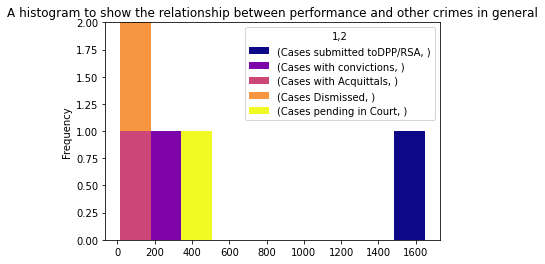

In [15]:
SubTotal.plot.hist(stacked=True, cmap='plasma',xlabel='Number of Cases' ,title='A histogram to show the relationship between performance and other crimes in general')

In [16]:
# Actual Crimes under (a) child Related Offences when sub total is removed
related=child[0:8]
related

,1,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court
,2,,,,,
S/No.,CASE/CRIME INCIDENCES,,,,,
25,Child Neglect,877,120,11,48,214
26,Child Desertion,194,48,1,14,54
27,Child Stealing,77,19,1,4,29
28,Child Trafficking,39,3,0,0,23
29,Child Abduction/Kidnap,180,17,2,9,71
31,Child Abuse/Torture,243,28,0,4,46
32,Infanticide,23,4,0,3,10
33,Abortion,16,4,1,1,5


In [17]:
# Displaying the sum of values of other crimes to be ploted on the graph
ByCat=related.sum(axis=1)
ByCat

S/No.  CASE/CRIME INCIDENCES 
25     Child Neglect             1270
26     Child Desertion            311
27     Child Stealing             130
28     Child Trafficking           65
29     Child Abduction/Kidnap     279
31     Child Abuse/Torture        321
32     Infanticide                 40
33     Abortion                    27
dtype: int64

<AxesSubplot:title={'center':'A bar graph showing Cases(Performance) under Child related related cases'}, xlabel='Category)', ylabel='Number of CRIME INCIDENCES'>

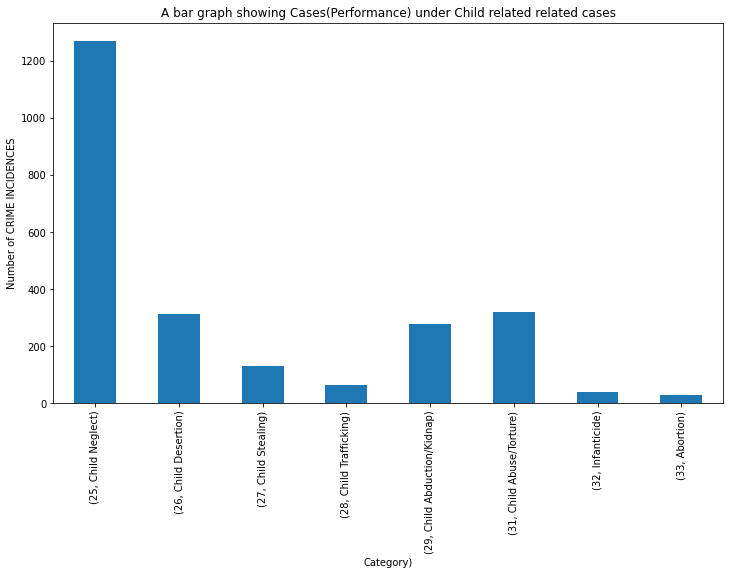

In [18]:
#Bargraph for Assaults
ByCat.plot.bar(figsize=(12,7),title='A bar graph showing Cases(Performance) under Child related related cases',ylabel='Number of CRIME INCIDENCES',xlabel='Category)')

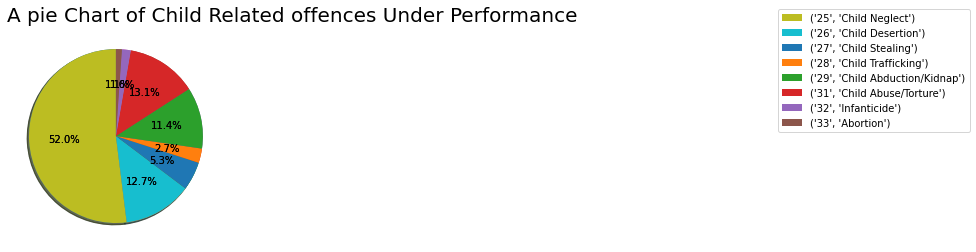

In [19]:
labels = list(ByCat.keys())
values = ByCat.values.tolist()
# Creating plot
fig1, ax1 = plt.subplots()
ax1.pie(values, autopct='%1.1f%%',shadow=True, startangle=90)
patches, texts, auto = ax1.pie(values, shadow=True, startangle=90, autopct='%1.1f%%')

#add justing the position of the legend on the pie char
plt.legend(patches, labels, bbox_to_anchor=(2.5,0.5), loc="lower right",bbox_transform=plt.gcf().transFigure)

#setting the title,its position and the fontsize
plt.title('A pie Chart of Child Related offences Under Performance', loc='left',fontsize=20)

# show plot
plt.show()

From the above summation,pie-chart and graph, we can deduct that Child neglect is the highest cause of child related offences with an unspecified reason followed by Child abuse/torture, Child desertion, Kidnap and finally child trafficking with the least record

In [20]:
#Determining the correlation of the Sex related Offences
related.corr()

,1,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court
,2,,,,,
1,2,,,,,
Cases submitted toDPP/RSA,,1.000000,0.972499,0.948627,0.971340,0.985880
Cases with convictions,,0.972499,1.000000,0.922276,0.978487,0.955746
Cases with Acquittals,,0.948627,0.922276,1.000000,0.970174,0.961131
Cases Dismissed,,0.971340,0.978487,0.970174,1.000000,0.976534
Cases pending in Court,,0.985880,0.955746,0.961131,0.976534,1.000000


In [21]:
#Describing the Child Related by performance
related.describe()

1,Cases submitted toDPP/RSA,Cases with convictions,Cases with Acquittals,Cases Dismissed,Cases pending in Court
2,,,,,
count,8.000000,8.000000,8.00000,8.000000,8.000000
mean,206.125000,30.375000,2.00000,10.375000,56.500000
std,284.491746,39.275356,3.70328,15.864943,67.428269
min,16.000000,3.000000,0.00000,0.000000,5.000000
25%,35.000000,4.000000,0.00000,2.500000,19.750000
50%,128.500000,18.000000,1.00000,4.000000,37.500000
75%,206.250000,33.000000,1.25000,10.250000,58.250000
max,877.000000,120.000000,11.00000,48.000000,214.000000


In [22]:
# Line graph for the child Related Offences with accordance to performance
related.iplot(kind='line',title='A line graph showing the relationship amongst Sex Related Offences with accordance to performance')

In [23]:
# Plotting a bar graph for ActualOtherCrimes
related.iplot(kind='bar',title='A bar graph showing the relationship amongst Sex Related Offences with accordance to performance')

KeyError: 'colorscale'

# 2. PERSONS TAKEN TO COURT under (a) child Related Offences ¶


In [ ]:
#Importing the mother column (PERSONS TAKEN TO COURT) and all its sub-columns
PTC=dcf['PERSONS TAKEN TO COURT']
PTC

# 2a)Accused convicted¶

In [ ]:
#Picking Up only the Accused convicted under under PERSONS TAKEN TO COURT of the whole dataset
PTC=PTC['ACCUSED CONVICTED']
PTC

In [ ]:
# importing ACCUSED CONVICTED under General crime category
Accusedconvicted=PTC[22:94]
Accusedconvicted

In [ ]:
# specific column for (a) child Related Offence and converting the whole data to integers
child=Accusedconvicted[8:17].astype(int)
child

In [ ]:
#displaying the Sub Total(Other Crimes-gen(Child related)) under Accused convicted
SubTotal=child[8:]
SubTotal

In [ ]:
# Getting the total sum of Child related cases
TotalSum=SubTotal.sum(axis=1)
TotalSum

In [ ]:
SubTotal.plot.hist(stacked=True, cmap='plasma',xlabel='Number of Cases' ,title='A histogram to show the relationship between performance and other crimes in general')

In [ ]:
# Actual Crimes under child Related Offences when sub total is removed
related=child[0:8]
related

In [ ]:
# Displaying the sum of values of Child Related Offences to be ploted on the graph
ByCat=related.sum(axis=1)
ByCat

In [ ]:
#Bargraph for CASE/CRIME INCIDENCES for child related offences
ByCat.plot.bar(figsize=(12,7),title='A bar graph showing Cases under Child related related cases',ylabel='Number of CRIME INCIDENCES',xlabel='Category')

Child neglect has the highest number of incidences when it comes to the accused convicted with the infanticide being the fewest

In [ ]:
#Describing the Child Related by Accused convicted
related.describe()

In [ ]:
# Plotting a bar graph for Accused convicted  under child related offences
related.iplot(kind='bar',title='A bar graph showing the relationship amongst child Related Offences with accordance to performance')

# 2b) ACCUSED CHARGED

In [ ]:
# Handling ACCUSED CHARGED under of the crime dataset
PA=dcf['PERSONS TAKEN TO COURT']
PA

In [ ]:
#Importing data about ACCUSED CHARGED from the crime dataset
PC=PA['ACCUSED CHARGED']
PC

In [ ]:
# specific column for rows and columns ACCUSED CHARGED and converting the objects to integer
Accusedcharge=PC[22:94]
Accusedcharge 

In [ ]:
# importing the Accused charge under the Child Related Offences and converting the objects to integer
Accusedcharge=Accusedcharge[8:17].astype(int)
Accusedcharge 

In [ ]:
#displaying the Sub Total(Other Crimes-gen(child related)) under Accused charged
SubTotal=Accusedcharge[8:]
SubTotal

In [ ]:
SubTotal.plot.hist(stacked=True, cmap='plasma',xlabel='Number of Cases' ,title='A histogram to show the relationship between performance and other crimes in general(Child related)')

In [ ]:
# Actual Crimes under (a) child Related Offences when sub total is removed
relate=Accusedcharge[0:8]
relate

In [ ]:
# Displaying the sum of values of Child related cases to be ploted on the graph
ByCat=relate.sum(axis=1)
ByCat

In [ ]:
#Bargraph for Child related offences
ByCat.plot.bar(figsize=(12,7),title='A bar graph showing Cases(Accused cases) under Child offences',ylabel='Number of CRIME INCIDENCES',xlabel='Child Related Cases)')

Child neglect has the highest number of incidences when it comes to the accused charged with infanticide and abortion being the fewest


In [ ]:
#Describing the child Related by Cases convicted
relate.describe()

In [ ]:
# Plotting a bar graph for Child related offences for Accused charged cases
relate.iplot(kind='bar',title='A bar graph showing the relationship amongst child related offences')

# 3. Reported Cases for (a) child Related Offences


In [ ]:
# Handling Reported cases under of the crime dataset
RC=dcf['REPORTED CASES']
RC

In [ ]:

# importing the reported cases under the general crimes category as whole with all sub-categories
reported=RC[22:94]
reported

In [ ]:
# importing the reported cases under the Child Related Offences and converting the objects to integer
reported=reported[8:17].astype(int)
reported 

In [ ]:
#displaying the Sub Total(Other Crimes-gen((b) Child Related Offences)) under Reported cases
SubTotal=reported[8:]
SubTotal

In [ ]:
# Ploting an histogram for the sub total under child related cases
SubTotal.plot.hist(stacked=True, cmap='plasma',xlabel='Number of Cases' ,title='A histogram to show the relationship between Reported cases and other crimes in general(child Related cases)')

In [ ]:
# Actual Crimes under Chid Related Offences when sub total is removed
reported=reported[0:8]
reported

In [ ]:
#Bargraph for For the child related cases in total
ByCat.plot.bar(figsize=(12,7),title='A bar graph showing Cases(Reported Cases) under Child related offences',ylabel='Number of CRIME INCIDENCES',xlabel='Child Related Cases)')

Child neglect has the highest number of incidences when it comes to the Reported cases with the infanticide being the fewest


In [ ]:
#Determining the correlation of the  Child Related by Reported cases
reported.corr()

In [ ]:
#Describing the Child Related by reported cases
reported.describe()

In [ ]:
#Accused charged in child related offences on a line graph
reported.iplot(kind='line',title='A line graph showing the relationship amongst Sex related offence')

# 4. SENTENCES IMPOSED BY COURTS¶

### 4a) IMPRISONMENT¶

In [ ]:
#Sentence imposed by the court by imprisonment
df = dcf['SENTENCES IMPOSED BY COURTS']['IMPRISONMENT']
df

In [ ]:
# importing imprisonment under General Crimes
imprisonment=df[22:94]
imprisonment

In [ ]:
#Selecting from Male Adult till COMM.WORK since values under Fines Awarded(UgShs) are different from the rest
imprisonment=imprisonment.loc[:,'Male Adult':'COMM. WORK']
imprisonment

In [ ]:
summs=imprisonment[8:17].astype(int)
summs

In [ ]:
# Actual Crimes under (g) Sentence imposed by courts by removing sub total from the list
summ=summs[0:8]
summ

In [ ]:
# Displaying the sum of values of other crimes to be ploted on the graph
ByCat=summ.sum(axis=1)
ByCat

In [ ]:
#Bargraph for Assaults
ByCat.plot.bar(figsize=(12,7),title='A bar graph showing Imprisonment by courts(imprisonment) under Child Related Offences ',ylabel='Number of CRIME INCIDENCES',xlabel='Category(Child related Related Offences )')

Child neglect has the highest number of incidences when it comes to the Imprisonment by court with the infanticide,abortion and child tracking being the fewest


In [ ]:
# Line graph for the Data stored in
summ.iplot(kind='line',title='A line graph showing the relationship amongst Sex Related by the imprisonement.')

In [ ]:
# Determining the percentage
s=summ.sum(axis=1)
summ.apply(lambda x: 100 * (x /s)).fillna(0).round(2)

# 4b) SENTENCES IMPOSED BY COURTS','VICTIMS OF CRIME

In [ ]:
#Sentence imposed by the court on victims of crimes under mother column SENTENCES IMPOSED BY COURTS
VCT = dcf['SENTENCES IMPOSED BY COURTS']['VICTIMS OF CRIME']
VCT

In [ ]:
# importing Victims under General Crimes category
victims=VCT[22:94]
victims

In [ ]:
# Importing Victims that fall under Child related cases under the general crimes
Vc=victims[8:17].astype(int)
Vc

In [ ]:
# Actual Crimes under  Sentence imposed by courts by removing sub total from the list
summ=Vc[0:8]
summ

In [ ]:
# Line graph for the child related cases that have been imprisoned
summ.iplot(kind='line',title='A line graph showing the relationship amongst child Related by the imprisonement.')

In [ ]:
#Describing the Victims of crimes under General Crimes (child Related Offences) 
summ.describe()

In [ ]:
# Determining the percentage of victims of (b) Child Related Offences
s=summ.sum(axis=1)
summ.apply(lambda x: 100 * (x /s)).fillna(0).round(2)

# Conclusions

1. Female juven make up the highest percentage of victims of child related crimes followed by the male juven
2. Child neglect tops up the incidences reported under child related crimes